In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def set_ch(): 
    "在plot图中显示中文"
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    return
set_ch() # 显示中文在plot中

In [3]:
data1 = pd.read_csv('1-dataset.csv',encoding='gbk')

# 饼图

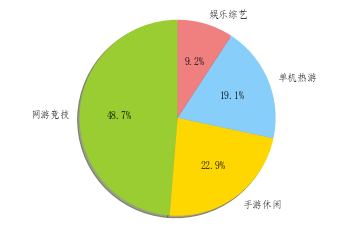

In [4]:
labels=tuple(data1['直播类型'].unique())
sizes=list(data1['直播类型'].value_counts())
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']#颜色数组
explode = (0, 0, 0, 0) # 设定扇形图与中心点的距离

fig = plt.figure() 

#根据相关参数画出饼图
plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
       autopct='%3.1f%%',#是否显示比例
       shadow=True,#是否显示阴影
        startangle=90)#起始角度
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')#显示方式，如果为equql,则显示一个正圆
plt.show()

# 叠状条形图

In [5]:
data2 = pd.read_csv('2-dataset.csv',encoding='gbk')

In [6]:
data2['评分分类'] = 0
data2['评分分类'] = data2['评分'].map(lambda x:1 if x>7.4 else 0)

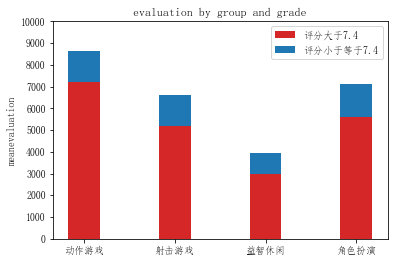

In [7]:
N = 4
df1 = data2[data2['评分分类']==1].groupby('类别')[['评论数']].mean()
df2 = data2[data2['评分分类']==0].groupby('类别')[['评论数']].mean()

highMeans=tuple(df1['评论数'])
lowMeans=tuple(df2['评论数'])


ind = np.arange(N)    # the x locations for the groups, 0,..,4
width = 0.35       # the width of the bars: can also be len(x) sequence
 
p1 = plt.bar(ind, highMeans, width, color='#d62728')#,yerr=highStd)
p2 = plt.bar(ind, lowMeans, width,
             bottom=highMeans)#,yerr=lowStd)# bottom y轴的起始位置

plt.ylabel('meanevaluation')
plt.title('evaluation by group and grade')
plt.xticks(ind, ('动作游戏', '射击游戏', '益智休闲', '角色扮演'))
plt.yticks(np.arange(0, 11000,1000))
plt.legend((p1[0], p2[0]), ('评分大于7.4', '评分小于等于7.4'),loc='upper right')

plt.show() 

# 核图

In [10]:
data3 = pd.read_csv('3-dataset.csv',encoding='gbk')

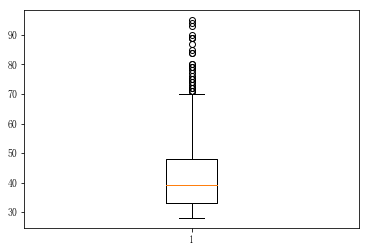

In [11]:
heat = data3["热度"].values
plt.boxplot(heat)
plt.show()

# 散点图

In [12]:
data4 = pd.read_csv('4-dataset.csv',encoding='gbk')

In [13]:
data4.groupby('类别')[['喜欢数']].mean()

,喜欢数
类别,
冒险解谜,1864.279070
模拟经营,1040.943396
竞速游戏,532.129412
策略塔防,805.655556


In [14]:
data4['类别'].value_counts()

策略塔防    90
冒险解谜    86
竞速游戏    85
模拟经营    53
Name: 类别, dtype: int64

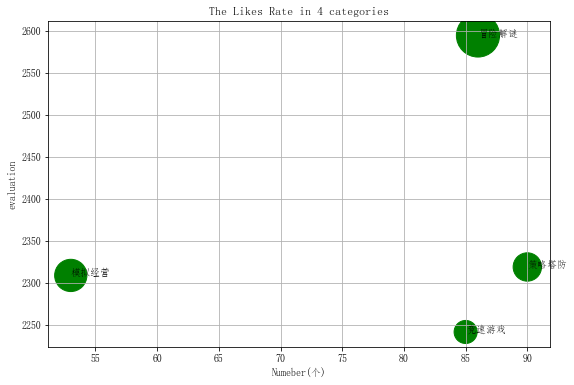

In [15]:
N=4
#手动设定好原始数据
category=['策略塔防','冒险解谜','竞速游戏','模拟经营']
number = list(data4['类别'].value_counts())
evaluation = [2318.78,2594.16,2241.47,2308.72]
likes = [805.66,1864.28,532.13,1040.94] 

fig = plt.figure(figsize=(9,6)) 

plt.scatter(number,evaluation,
           s=likes,c='g',marker='o')
for i in range(N):
    plt.annotate(category[i],
                xy=(number[i],evaluation[i]))
#画出x轴的名称
plt.xlabel('Numeber(个)')
#画出y轴的名称
plt.ylabel('evaluation')

#给plot命名一个title名称
plt.title('The Likes Rate in 4 categories')

plt.grid()
plt.xlim(min(number)-(max(number)-min(number))*0.05, max(number)+(max(number)-min(number))*0.05)#设定x轴的数值范围
plt.ylim(min(evaluation)-(max(evaluation)-min(evaluation))*0.05, max(evaluation)+(max(evaluation)-min(evaluation))*0.05)#设定y轴的数值范围

plt.show()

# 折线图

In [16]:
data5 = pd.read_csv('5-dataset.csv',encoding='gbk')
data5.head()

,最后更新时间,平均喜欢数
0,2016-01-11,705
1,2016-01-12,380
2,2016-01-13,114
3,2016-01-14,437
4,2016-01-15,4320


In [17]:
data5['最后更新时间'] = pd.to_datetime(data5['最后更新时间'], format='%Y-%m-%d')
data5['时间差'] = data5['最后更新时间']-data5['最后更新时间'].iloc[0]
data5['时间差'] = data5['时间差'].dt.total_seconds()/(24*60*60.0)

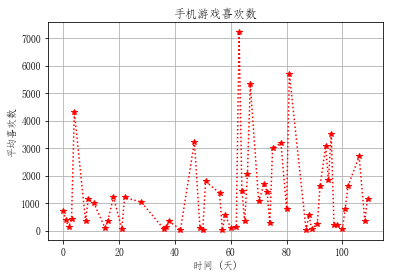

In [18]:
t = list(data5['时间差'])
s = list(data5['平均喜欢数'])

line, = plt.gca().plot(t, s)
line.set_marker('*')
line.set_linestyle(':')
line.set_color('r')

plt.xlabel('时间 (天)')
plt.ylabel('平均喜欢数')
plt.title('手机游戏喜欢数')
plt.grid(True)
plt.show()